# 装甲板识别

## 导入

In [1]:
from typing import Any, Sequence, Tuple

import cv2
from cv2 import Mat, imread
from matplotlib import pyplot
from numpy import array
import matplotlib
import numpy

## 读取图像

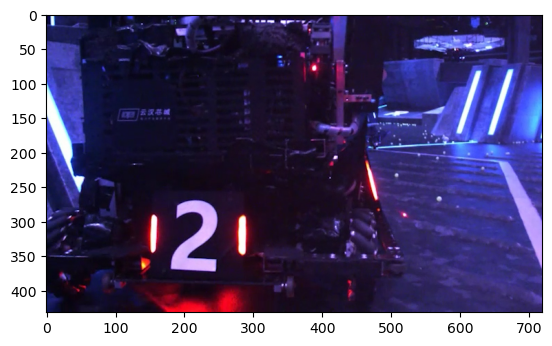

In [2]:
# image: Mat = imread('Blue-5.jpeg')
image: Mat = imread('Red-2.jpg')
# image: Mat = imread('mimikko.jpg')
# image: Mat = imread('img.png')

pyplot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

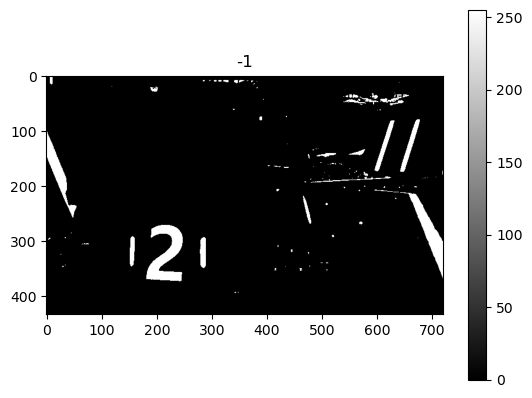

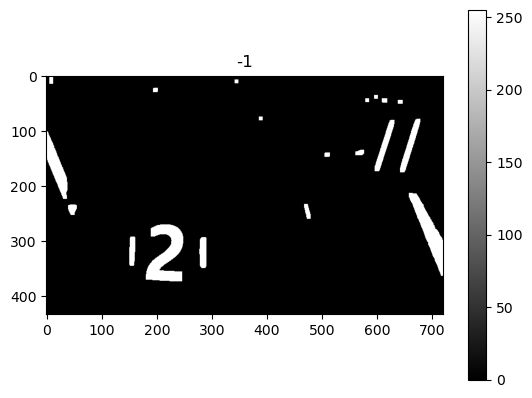

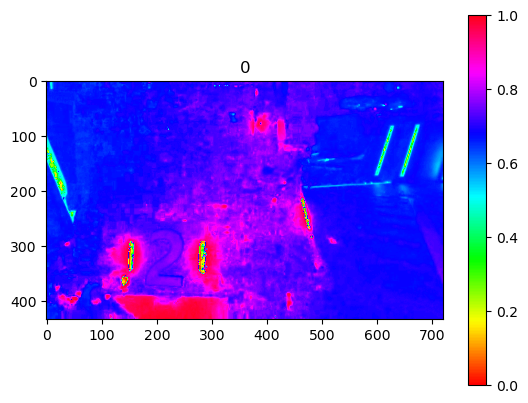

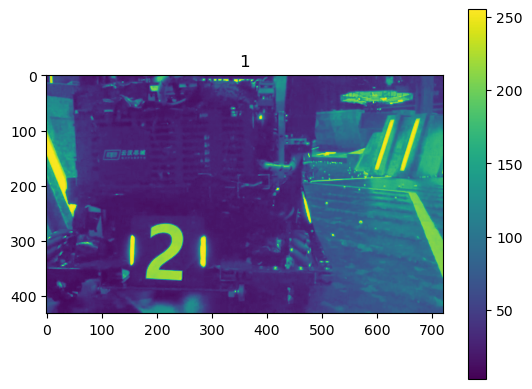

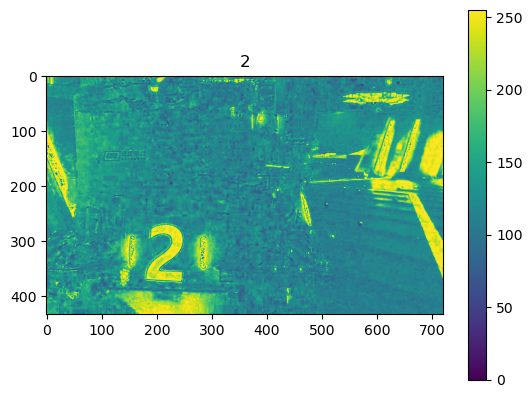

In [3]:
image_HLS = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

channels: Sequence[Mat] = cv2.split(image_HLS)

image_Light = cv2.inRange(image_HLS, array([0, 190, 0]), array([180, 255, 255]))


pyplot.title(-1)
pyplot.imshow(image_Light, cmap = 'gray')
pyplot.colorbar()

pyplot.figure()
image_Light=cv2.erode(image_Light, numpy.ones((3, 3)), iterations = 2)
image_Light=cv2.dilate(image_Light, numpy.ones((3, 3)), iterations = 3)

# pyplot.imshow(cv2.cvtColor(image_HLS, cv2.COLOR_BGR2RGB))
# pyplot.figure()

pyplot.title(-1)
pyplot.imshow(image_Light, cmap = 'gray')
pyplot.colorbar()

pyplot.figure()

pyplot.title(0)
cmap = matplotlib.cm.get_cmap('hsv')
norm = matplotlib.colors.Normalize(vmin = 0, vmax = 255)
pyplot.imshow(channels[0], cmap = cmap)
pyplot.colorbar(matplotlib.cm.ScalarMappable(cmap = cmap))

pyplot.figure()
pyplot.title(1)
pyplot.imshow(channels[1])
pyplot.colorbar()

pyplot.figure()
pyplot.title(2)
pyplot.imshow(channels[2])
pyplot.colorbar()

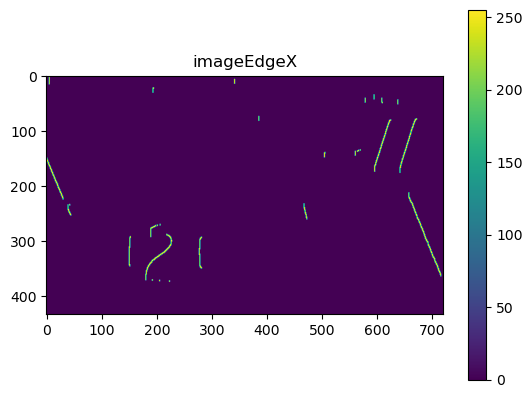

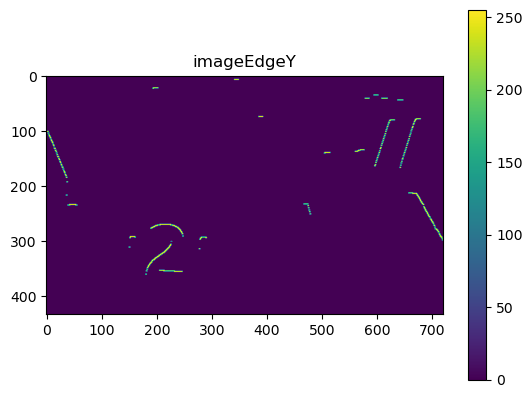

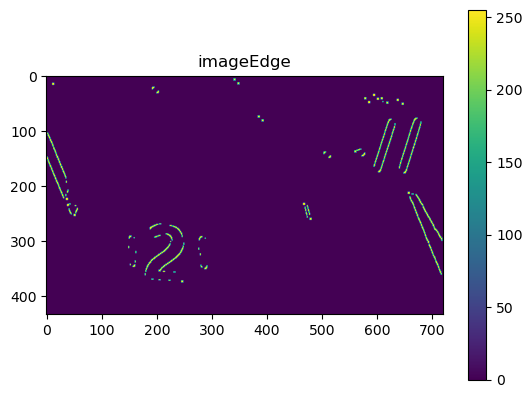

In [4]:
imageEdgeX = cv2.Sobel(image_Light, ddepth = cv2.CV_8UC1, dx = 1, dy = 0, ksize =3)
imageEdgeY = cv2.Sobel(image_Light, ddepth = cv2.CV_8UC1, dx = 0, dy = 1, ksize = 3)
imageEdge = cv2.Sobel(image_Light, ddepth = cv2.CV_8UC1, dx = 1, dy = 1, ksize = 5)

pyplot.figure()
pyplot.title("imageEdgeX")
pyplot.imshow(imageEdgeX)
pyplot.colorbar()

pyplot.figure()
pyplot.title("imageEdgeY")
pyplot.imshow(imageEdgeY)
pyplot.colorbar()

pyplot.figure()
pyplot.title("imageEdge")
pyplot.imshow(imageEdge)
pyplot.colorbar()